### Import

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup

### Load datasets

In [4]:
positif = pd.read_pickle(r'imdb_raw_pos.pickle')

negatif = pd.read_pickle(r'imdb_raw_neg.pickle')

In [5]:
pos = {'review': positif}

neg = {'review': negatif}

### Create a dataFrame

In [7]:
# Creates pandas DataFrame.
df1 = pd.DataFrame(pos)
df1['comment'] = 1

In [8]:
df2 = pd.DataFrame(neg)
df2['comment'] = 0

In [9]:
data = pd.concat([df1, df2])
data.head()

,review,comment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [10]:
data = data.sample(frac=1).reset_index()

data = data.drop(['index'], axis=1)

In [11]:
data.head()

,review,comment
0,The Bone Collector is set in New York City & s...,0
1,"This is a wonderfully gritty drama, detailing ...",1
2,My husband dragged me to this film as I had no...,1
3,"Being a freshman in college, this movie remind...",1
4,I swear if I did ever tried cocaine I'd be abl...,1


<H2 style='color: cadetblue'> data cleaning </H2>

In [12]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return text.replace('\[[^]]*\]', '')

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [13]:
data['review']=data['review'].apply(denoise_text)

/usr/local/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [14]:
def remove_special_characters(text, remove_digits=True):
    return text.replace('[^a-zA-z0-9\s]', '')

In [15]:
data['review']=data['review'].apply(remove_special_characters)

In [16]:
data['review']

0        The Bone Collector is set in New York City & s...
1        This is a wonderfully gritty drama, detailing ...
2        My husband dragged me to this film as I had no...
3        Being a freshman in college, this movie remind...
4        I swear if I did ever tried cocaine I'd be abl...
                               ...                        
24995    I enjoyed this film very much. It effectively ...
24996    it's the best movie i have ever seen!!!!!! i j...
24997    There is a need for this kind of entertainment...
24998    If you know anything about the Manhattan Proje...
24999    Being a completely broke film buff with a hous...
Name: review, Length: 25000, dtype: object

### split dataset with 30% of datasets

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(data.review,data.comment, test_size= 0.3)

In [18]:
print("X_train = " , X_train.shape)
print("X_test = " , X_test.shape)
print("Y_train = " , Y_train.shape)
print("Y_test = " , Y_test.shape)

X_train =  (17500,)
X_test =  (7500,)
Y_train =  (17500,)
Y_test =  (7500,)


### Vectorization

In [19]:
cv=CountVectorizer(stop_words='english', binary=False,ngram_range=(1,1))

In [20]:
cv_train_reviews=cv.fit_transform(X_train)

In [21]:
cv_test_reviews=cv.transform(X_test)

In [22]:
print('BOW_cv_train:',cv_train_reviews.shape)

BOW_cv_train: (17500, 64418)


In [23]:
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_test: (7500, 64418)


In [24]:
print(cv_train_reviews)

  (0, 20621)	1
  (0, 37972)	3
  (0, 44516)	1
  (0, 20563)	1
  (0, 1437)	1
  (0, 23600)	1
  (0, 11132)	1
  (0, 20565)	1
  (0, 48408)	1
  (0, 4731)	1
  (0, 24321)	1
  (0, 57265)	1
  (0, 53156)	1
  (0, 34945)	1
  (0, 12394)	1
  (0, 53102)	1
  (0, 46462)	1
  (0, 19726)	1
  (0, 24801)	1
  (0, 5214)	1
  (1, 355)	1
  (1, 62560)	1
  (1, 62208)	1
  (1, 11651)	1
  (1, 56562)	2
  :	:
  (17499, 53246)	1
  (17499, 36027)	1
  (17499, 22082)	2
  (17499, 17386)	1
  (17499, 2377)	1
  (17499, 56601)	1
  (17499, 4234)	1
  (17499, 14612)	3
  (17499, 37626)	1
  (17499, 42816)	1
  (17499, 12097)	1
  (17499, 52896)	1
  (17499, 30624)	4
  (17499, 34653)	4
  (17499, 29299)	1
  (17499, 22735)	1
  (17499, 24024)	2
  (17499, 22875)	1
  (17499, 1247)	1
  (17499, 44821)	1
  (17499, 14428)	2
  (17499, 16408)	1
  (17499, 47870)	2
  (17499, 42245)	1
  (17499, 51403)	1


In [25]:
cv.vocabulary_

{'fantastic': 20621,
 'movie': 37972,
 'prisoners': 44516,
 'famous': 20563,
 'actors': 1437,
 'george': 23600,
 'clooney': 11132,
 'fan': 20565,
 'roll': 48408,
 'bad': 4731,
 'good': 24321,
 'thing': 57265,
 'soundtrack': 53156,
 'man': 34945,
 'constant': 12394,
 'sorrow': 53102,
 'recommand': 46462,
 'everybody': 19726,
 'greetings': 24801,
 'bart': 5214,
 '1940': 355,
 'westerns': 62560,
 'watch': 62208,
 'comes': 11651,
 'tcm': 56562,
 'fmc': 21920,
 'flawed': 21660,
 'historically': 26917,
 'extremely': 20272,
 'entertaining': 19139,
 'acted': 1409,
 'plus': 43437,
 'got': 24466,
 'randolph': 45974,
 'scott': 49995,
 'favorite': 20810,
 'actor': 1435,
 'second': 50275,
 'gary': 23276,
 'cooper': 12726,
 'ok': 40213,
 'fourth': 22310,
 'coop': 12724,
 'charlton': 10031,
 'heston': 26652,
 'gregory': 24810,
 'peck': 42075,
 'film': 21264,
 'reasonably': 46301,
 'accurate': 1304,
 'said': 49095,
 'flows': 21855,
 'bet': 6059,
 've': 61029,
 'seen': 50362,
 '50': 697,
 '60': 776,
 '

### Logistic regression model on test dataset

In [26]:
lr=LogisticRegression(max_iter=5000)

In [27]:
cv_train_reviews.shape

(17500, 64418)

In [28]:
Y_train.shape

(17500,)

In [29]:
lr_bow=lr.fit(cv_train_reviews,Y_train)

In [30]:
lr_bow.score(cv_train_reviews, Y_train)

0.9986857142857143

In [31]:
lr_bow.score(cv_test_reviews, Y_test)

0.8782666666666666

### Top 10 words

In [32]:
coeff = lr_bow.coef_

In [45]:
sort = np.argsort(abs(coeff))

In [46]:
sort

array([[55853, 38728, 60613, ..., 56916, 63488, 62193]])

In [47]:
sort = sort[0][::-1][:10]

In [48]:
sort

array([62193, 63488, 56916,  4526, 36102, 19851, 20446, 46734, 16182,
        7265])

In [52]:
list_index = []
for i in sort :
    list_index.append(i)

In [53]:
list_index

[62193, 63488, 56916, 4526, 36102, 19851, 20446, 46734, 16182, 7265]

In [55]:
words = []
for i in list_index:
    words.append(list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)])    

In [56]:
words

['waste',
 'worst',
 'terrible',
 'awful',
 'mediocre',
 'excellent',
 'fails',
 'refreshing',
 'disappointing',
 'boring']

### Predict

In [33]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

[0 0 0 ... 1 1 1]


### Accuracy of the model

In [34]:
lr_bow_score=accuracy_score(Y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8832


### The classification report

In [35]:
lr_bow_report=classification_report(Y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.88      3778
    Negative       0.88      0.89      0.88      3722

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



### confusion matrix

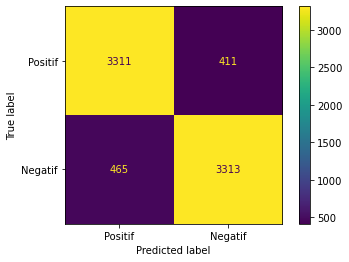

In [36]:
cm_bow=confusion_matrix(Y_test,lr_bow_predict,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bow, display_labels=['Positif', 'Negatif'])
disp.plot()

### Test

In [82]:
from collections import OrderedDict
import operator

In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [84]:
vectorizer = CountVectorizer()
vectorizer.fit(data.review)

CountVectorizer()

In [85]:
sort_by_grade = operator.itemgetter(1)

In [86]:
test = vectorizer.vocabulary_

In [87]:
sorted_value_key_pairs = sorted(test.items(), key=sort_by_grade, reverse=True)

In [88]:
{k: v for v, k in sorted_value_key_pairs}

{75015: 'כרמון',
 75014: 'יגאל',
 75013: 'żmijewski',
 75012: 'þór',
 75011: 'þorleifsson',
 75010: 'ýs',
 75009: 'üzümcü',
 75008: 'ünfaithful',
 75007: 'ünel',
 75006: 'überwoman',
 75005: 'übermenschlich',
 75004: 'übermensch',
 75003: 'über',
 75002: 'úber',
 75001: 'özdemir',
 75000: 'örnek',
 74999: 'önsjön',
 74998: 'óli',
 74997: 'ïts',
 74996: 'ïn',
 74995: 'île',
 74994: 'ís',
 74993: 'être',
 74992: 'étoile',
 74991: 'étienne',
 74990: 'était',
 74989: 'époque',
 74988: 'émigrés',
 74987: 'émigré',
 74986: 'éloge',
 74985: 'élan',
 74984: 'édith',
 74983: 'écoffey',
 74982: 'çetin',
 74981: 'ça',
 74980: 'æon',
 74979: 'æbler',
 74978: 'âge',
 74977: 'ànd',
 74976: 'ªsen',
 74975: 'zübert',
 74974: 'zázvorková',
 74973: 'zzzzzzzzzzzzzzzzzz',
 74972: 'zzzzzzzzzzzzz',
 74971: 'zzzzzzzzzzzz',
 74970: 'zzzzzzzzz',
 74969: 'zzzzz',
 74968: 'zzzzip',
 74967: 'zzzz',
 74966: 'zz',
 74965: 'zylberstein',
 74964: 'zwick',
 74963: 'zweite',
 74962: 'zwarts',
 74961: 'zwart',
 74960: '

In [42]:
X_bag_of_words

<25000x75016 sparse matrix of type '<class 'numpy.int64'>'
	with 3366100 stored elements in Compressed Sparse Row format>